In [2]:
import lda
import sys
sys.path.append('..')
from semcable.experiment import Experiment

doc_word_mat = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()

e = Experiment(doc_word_mat, vocab)

In [3]:
#import logging
#logging.disable(logging.CRITICAL)

e.fit_lda()

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -722621
INFO:lda:<20> log likelihood: -700844
INFO:lda:<30> log likelihood: -689268
INFO:lda:<40> log likelihood: -684509
INFO:lda:<50> log likelihood: -680135
INFO:lda:<60> log likelihood: -677092
INFO:lda:<70> log likelihood: -675643
INFO:lda:<80> log likelihood: -673406
INFO:lda:<90> log likelihood: -671983
INFO:lda:<100> log likelihood: -671082
INFO:lda:<110> log likelihood: -670354
INFO:lda:<120> log likelihood: -668943
INFO:lda:<130> log likelihood: -668919
INFO:lda:<140> log likelihood: -668087
INFO:lda:<150> log likelihood: -667652
INFO:lda:<160> log likelihood: -666917
INFO:lda:<170> log likelihood: -666140
INFO:lda:<180> log likelihood: -666096
INFO:lda:<190> log likelihood: -666015
INFO:lda:<200> log likelihood: -665115
INFO:lda:<210> log likelihood: -663909
INFO:lda:<220> log likelihood: -

In [4]:
ldam = e.model

In [8]:
print(ldam.loglikelihood())
print(ldam.loglikelihoods_)

-656156.7133368434
[-1051747.5468650647, -722620.6672350994, -700843.989134124, -689267.8866105847, -684509.1276161359, -680134.5744395119, -677092.2716663887, -675643.4050458781, -673406.1623524663, -671983.3978341792, -671081.5595401687, -670354.2745700844, -668942.774817921, -668919.4218711139, -668087.3005584857, -667652.3542344222, -666917.0033279896, -666140.0514475559, -666095.8985851676, -666015.4915739439, -665115.2217926315, -663908.5761210665, -663761.2998331212, -663211.1173674196, -663121.7749980524, -662898.6913703858, -663144.1861092607, -662636.8166298822, -662346.5301412737, -662093.7369546472, -662265.9526326403, -661814.8560022512, -661284.7384736281, -661085.5946001665, -661337.1461076222, -661136.250708699, -661212.5056099148, -660454.6013386168, -660627.8075401685, -660233.8762639144, -660247.4285898415, -659914.5655100431, -659974.4951747033, -659930.0132410841, -659806.4809084195, -659813.7479118439, -659423.1665441577, -659413.5837016567, -659348.0191111983, -6

In [12]:
e.calculate_adjacency()

In [14]:
e.make_graph()

In [ ]:
# from collections import Counter
# c = list(Counter(e.degs).items())
# freq = np.array([a[1] for a in c], dtype=float)
# freq = freq/freq.sum()
# plt.bar(range(len(freq)), freq)
# plt.show()
# sf = np.flipud(np.sort(freq))
# plt.bar(range(len(freq)), sf);plt.show()
# plt.loglog(sf, marker='o', lw=0)

In [15]:
%matplotlib inline
sA = e.A.sum()
sA/len(e.A)

11.663691874119305

In [18]:
e.fit_powerlaw()
e.power_law_coefficients

array([-1.50523811, -0.41108982])

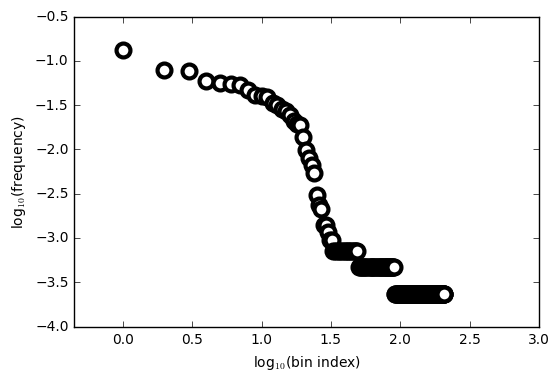

In [19]:
def plot_powerfit(experiment, title='Power law fit plot'):

    plt.plot(experiment.log_k, experiment.log_freq, marker='o', mew=3,
             color='white', lw=0, ms=10)
#    plt.plot(np.arange(n_counts)[:4],
 #            self.fit_v[:4], color='red', lw=3)
    plt.xlim([-0.35, 3])
#    plt.ylim([self.logv.min() - 0.25, 0])
    plt.xlabel('log$_{10}$(bin index)')
    plt.ylabel('log$_{10}$(frequency)')
    #plt.title('nbins = {}'.format(n_counts))
    #plt.text(1.85, -1.25, '$\\beta = %.2f$' % self.beta, fontsize=15,
    #         bbox={'facecolor': '#1E90FF', 'alpha': 0.5, 'pad': 10})
    plt.show()
    
plot_powerfit(e)

## Building the graph 

There are two steps to this process:

1. Create a subgraph by starting from cue node, get all associates. Then treat all associates as cues and see what associates follow. Could add an option for `n_jumps`, but for now, just do two jumps
2. Visualize the graph 

This has been implemented in `Experiment.visualize_graph`

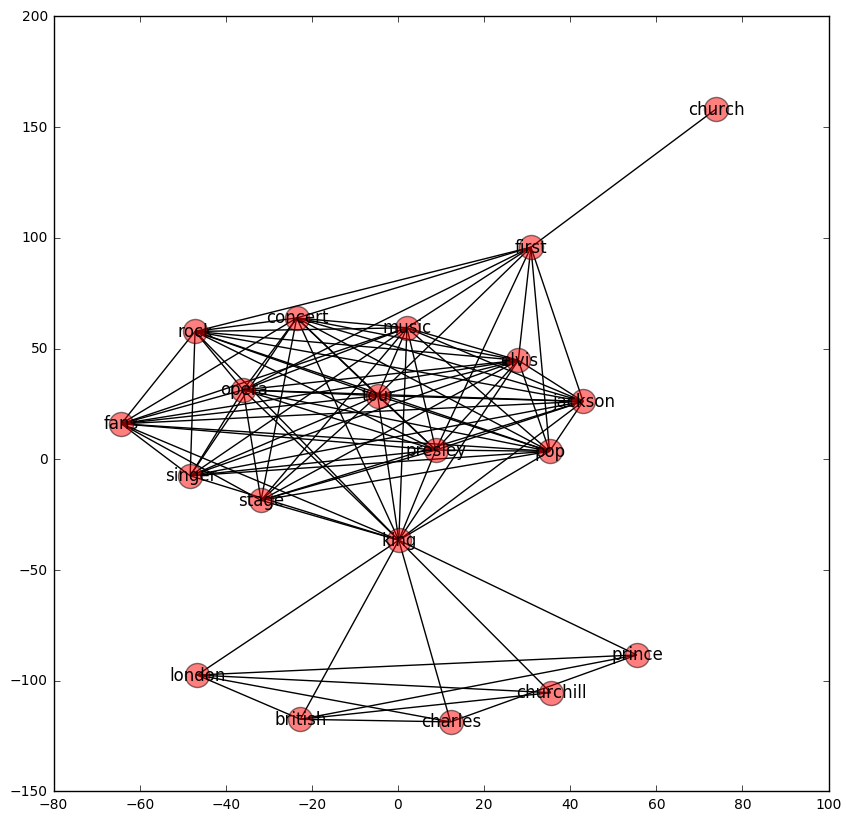

In [22]:
e.visualize_graph('music')

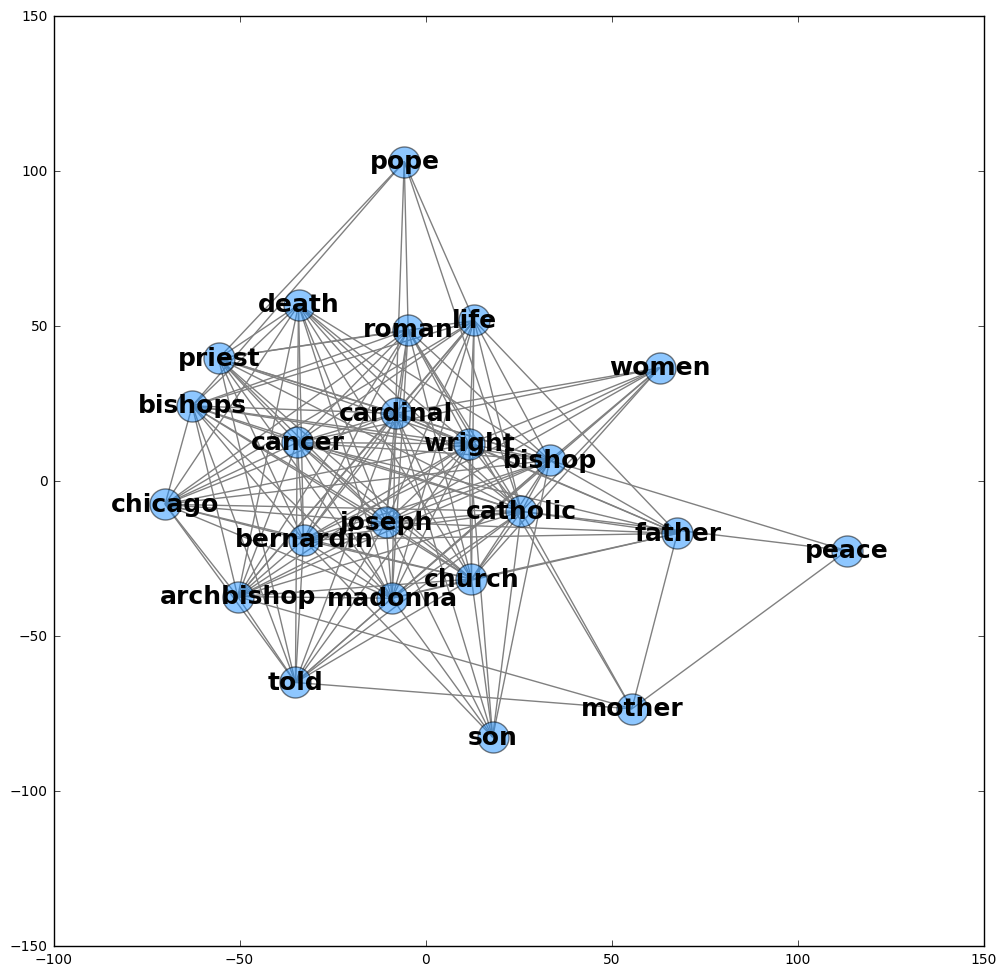

In [41]:
e.visualize_graph('church', node_color='dodgerblue', layout='graphviz', figsize=(12, 12))

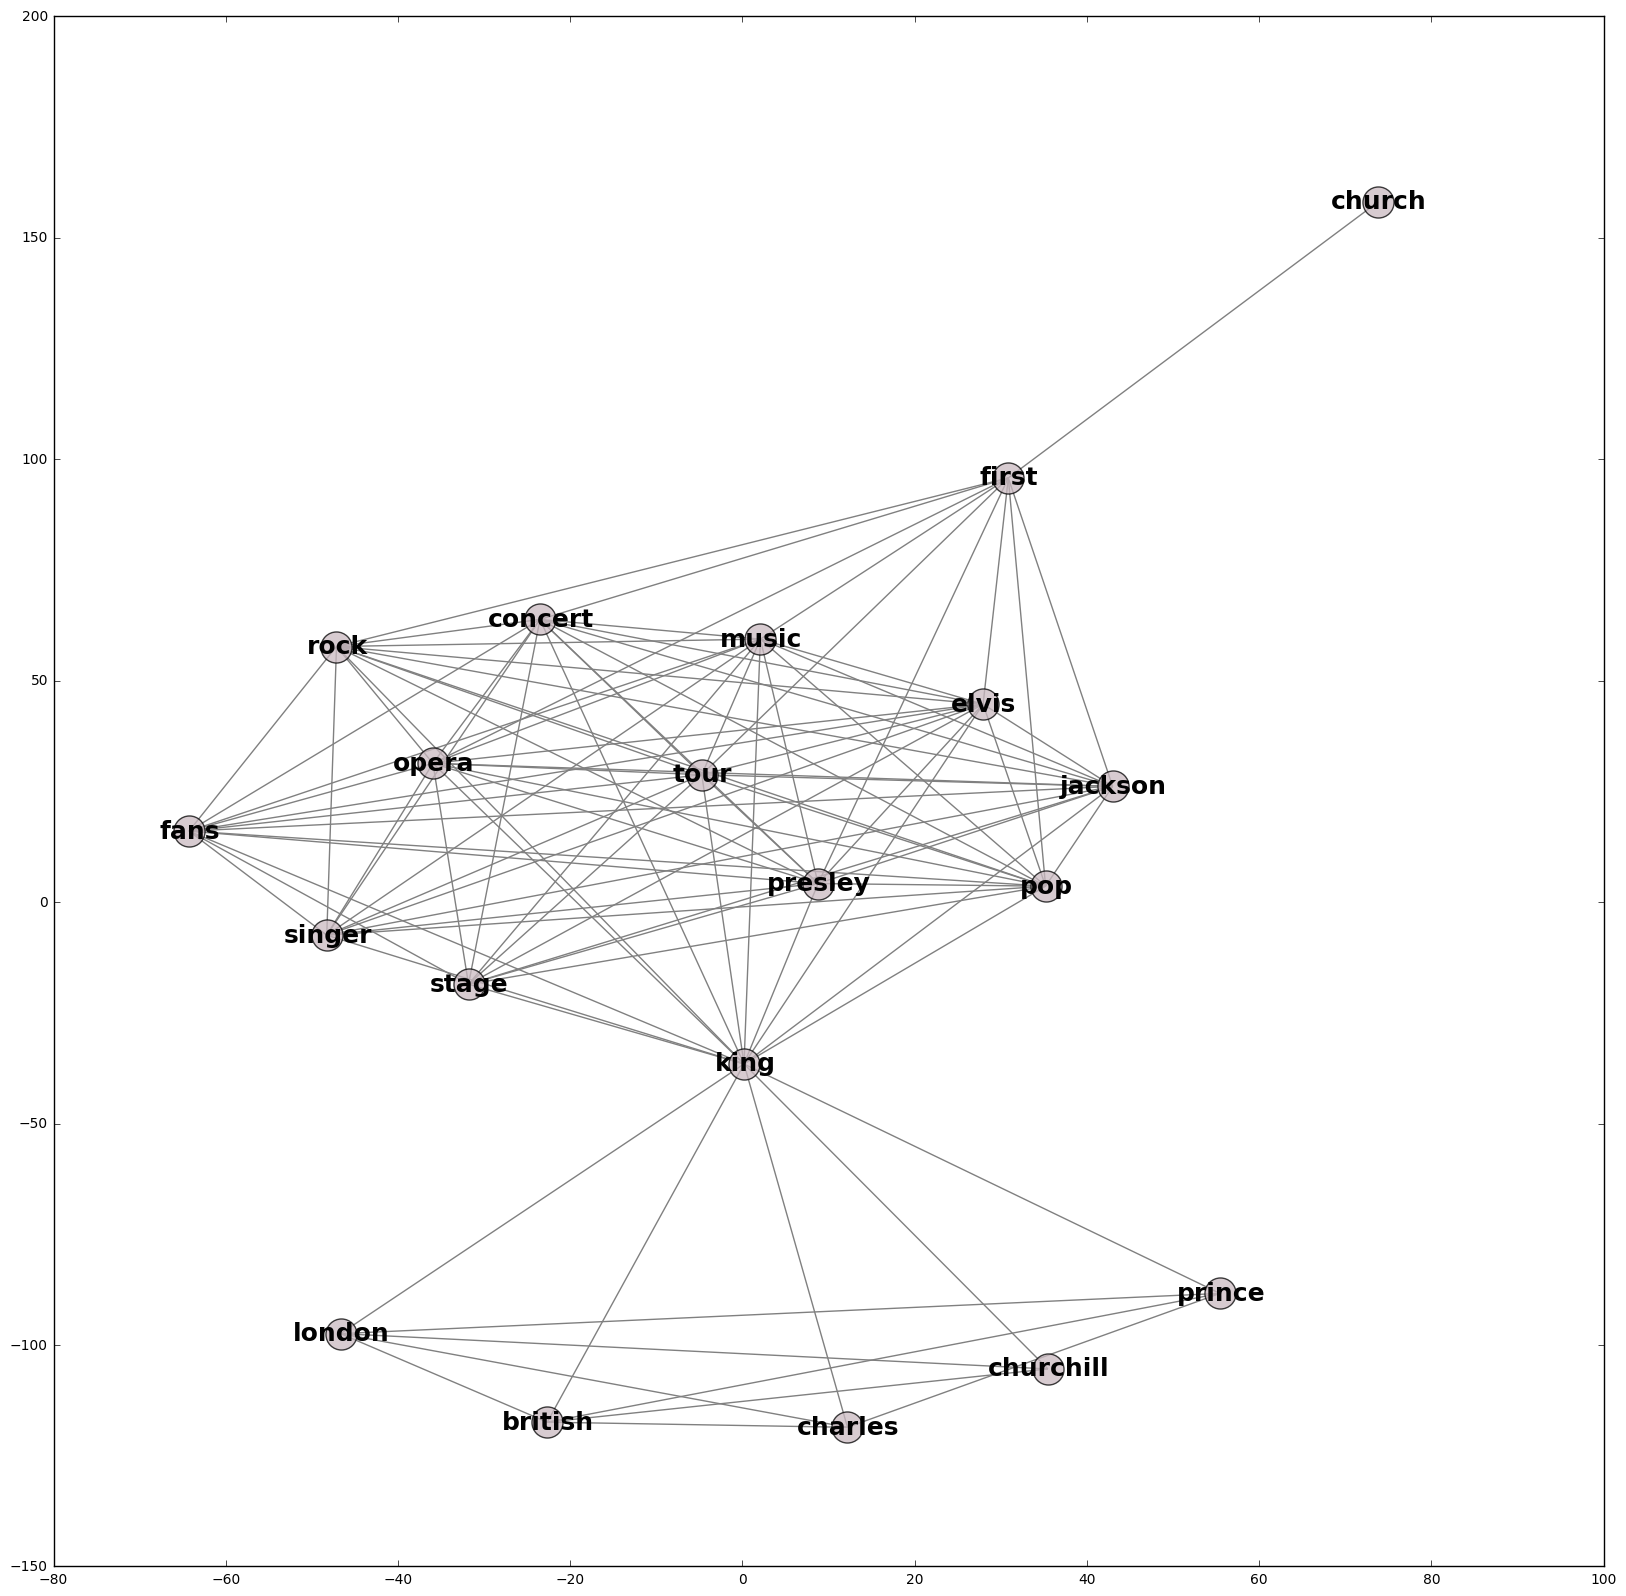

In [60]:
e.visualize_graph('elvis', layout='graphviz', figsize=(20, 20), alpha=0.75)

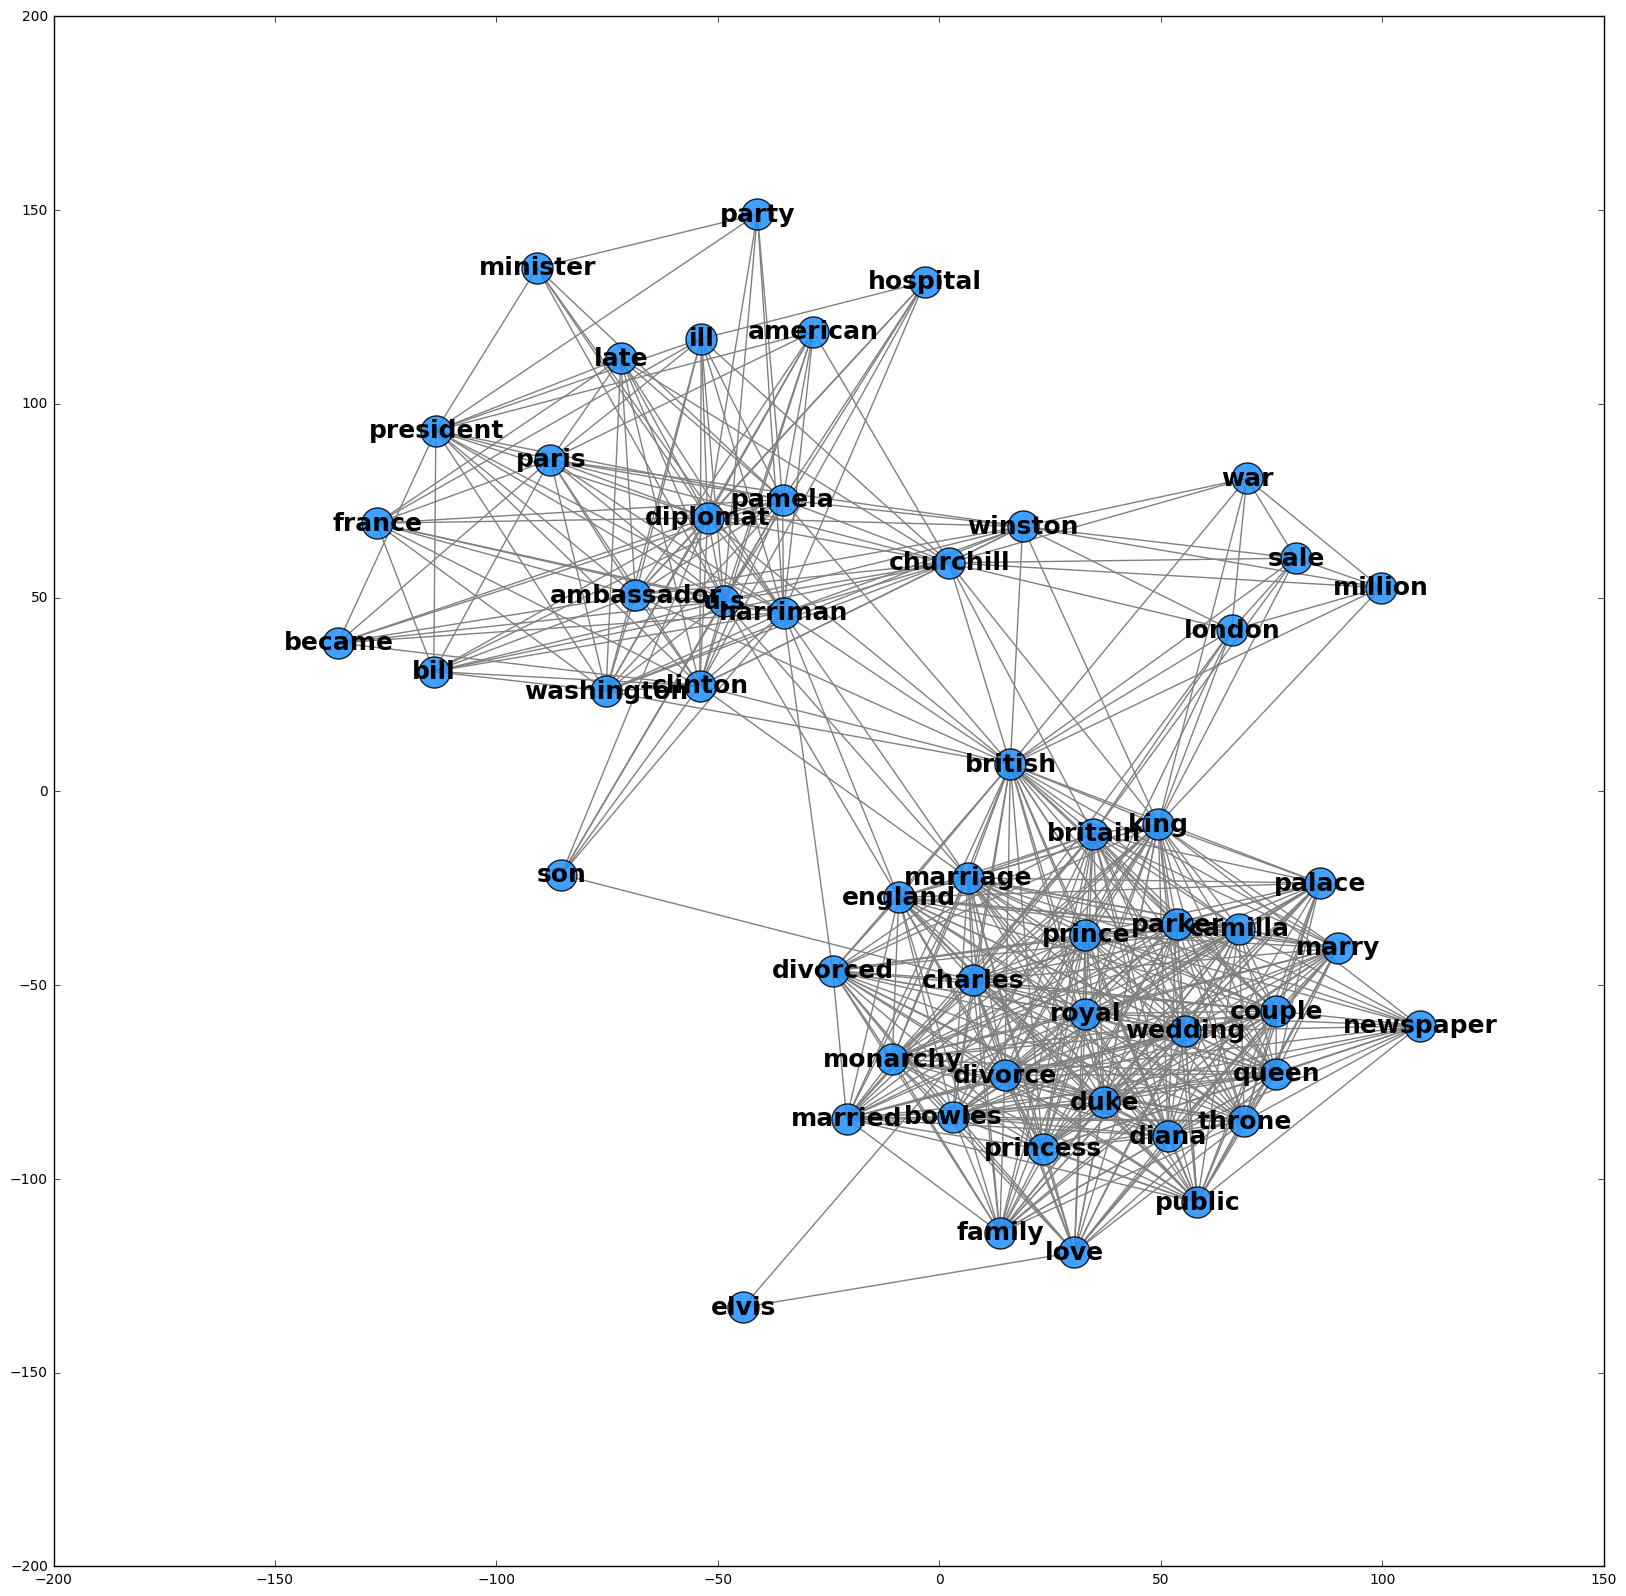

In [58]:
e.visualize_graph('england', node_color='dodgerblue', layout='graphviz', figsize=(20, 20), alpha=0.85)